In [1]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard

from keras.layers import *
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
import tensorflow as tf
tf.config.list_physical_devices('GPU')

import matplotlib.pyplot as plt

import numpy as np
import os
import random
import scipy.misc
from tqdm import *

%matplotlib inline

In [7]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("Maysee/tiny-imagenet")

ImportError: cannot import name 'DEFAULT_CALLBACK' from 'fsspec.callbacks' (/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/fsspec/callbacks.py)

In [ ]:
from sklearn.model_selection import train_test_split

train_data,_ = train_test_split(dataset['train']['image'], train_size=.15)
X_train, X_test = train_test_split(train_data, test_size=.1)
X_train_secret, X_train_cover = train_test_split(X_train, test_size=.5)
X_test_secret, X_test_cover = train_test_split(X_test, test_size=.5)

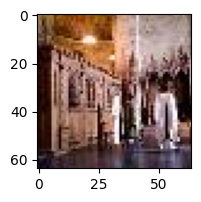

In [ ]:
plt.figure(figsize=(7,2))
plt.imshow(X_train_secret[3])


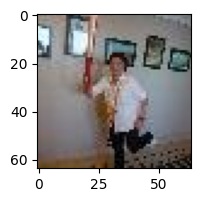

In [ ]:
plt.figure(figsize=(7,2))
plt.imshow(X_train_cover[3])

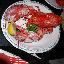

In [ ]:
X_train_secret[0]

In [ ]:
 tf.keras.utils.img_to_array(X_train_secret[0].convert('RGB'))

array([[[  0.,  10.,   5.],
        [  0.,  11.,   7.],
        [  1.,  11.,  10.],
        ...,
        [ 89.,  16.,   1.],
        [ 84.,  17.,   0.],
        [ 70.,   5.,   0.]],

       [[  0.,  10.,   6.],
        [  0.,  12.,   8.],
        [  3.,  13.,  12.],
        ...,
        [ 89.,  11.,   0.],
        [ 91.,  18.,   1.],
        [103.,  35.,  14.]],

       [[  0.,   9.,   5.],
        [  0.,  11.,   7.],
        [  4.,  13.,  12.],
        ...,
        [109.,  22.,  12.],
        [112.,  30.,  16.],
        [ 91.,  12.,   0.]],

       ...,

       [[ 30.,   2.,   0.],
        [ 29.,   0.,   0.],
        [ 34.,   0.,   0.],
        ...,
        [ 38.,  38.,  38.],
        [ 44.,  44.,  44.],
        [ 47.,  47.,  47.]],

       [[ 32.,   3.,   8.],
        [ 31.,   0.,   5.],
        [ 33.,   0.,   4.],
        ...,
        [ 29.,  29.,  29.],
        [ 32.,  32.,  32.],
        [ 35.,  35.,  35.]],

       [[ 33.,   3.,  13.],
        [ 32.,   0.,  11.],
        [ 32.,  

In [ ]:
#Converting the Dataset to a numpy array
for i in range(len(X_train_secret)):
    X_train_secret[i] = tf.keras.utils.img_to_array(X_train_secret[i].convert('RGB'))
    X_train_cover[i] = tf.keras.utils.img_to_array(X_train_cover[i].convert('RGB'))

for i in range(len(X_test_secret)):
    X_test_secret[i] = tf.keras.utils.img_to_array(X_test_secret[i].convert('RGB'))
    X_test_cover[i] = tf.keras.utils.img_to_array(X_test_cover[i].convert('RGB'))


In [ ]:
X_train_cover[0]

array([[[169., 182., 190.],
        [151., 164., 170.],
        [161., 174., 180.],
        ...,
        [201., 204., 193.],
        [171., 174., 163.],
        [199., 202., 191.]],

       [[161., 174., 182.],
        [156., 169., 175.],
        [164., 178., 181.],
        ...,
        [208., 211., 200.],
        [206., 209., 198.],
        [199., 202., 191.]],

       [[146., 161., 166.],
        [157., 172., 177.],
        [169., 183., 186.],
        ...,
        [158., 160., 149.],
        [196., 198., 187.],
        [205., 207., 196.]],

       ...,

       [[160., 178., 190.],
        [165., 183., 195.],
        [169., 187., 197.],
        ...,
        [204., 218., 219.],
        [205., 219., 222.],
        [199., 213., 214.]],

       [[167., 181., 194.],
        [168., 182., 195.],
        [169., 186., 196.],
        ...,
        [200., 214., 217.],
        [201., 214., 220.],
        [201., 215., 218.]],

       [[171., 183., 197.],
        [168., 180., 194.],
        [170., 1

In [ ]:
#Converting the lists to a numpy array
X_train_secret=np.array(X_train_secret)
X_train_cover=np.array(X_train_cover)
X_test_secret=np.array(X_test_secret)
X_test_cover=np.array(X_test_cover)

In [ ]:
X_train_secret = X_train_secret[0:X_train_secret.shape[0] // 12]
X_train_cover = X_train_cover[0:X_train_cover.shape[0] // 12]

In [ ]:
#Normalising the training and testing dataset
for i in range(len(X_train_secret)):
    X_train_secret[i] = X_train_secret[i]/255
    X_train_cover[i] = X_train_cover[i]/255
for i in range(len(X_test_secret)):
    X_test_secret[i] = X_test_secret[i]/255
    X_test_cover[i] = X_test_cover[i]/255


In [ ]:
X_train_secret[0]

array([[[0.        , 0.03921569, 0.01960784],
        [0.        , 0.04313726, 0.02745098],
        [0.00392157, 0.04313726, 0.03921569],
        ...,
        [0.34901962, 0.0627451 , 0.00392157],
        [0.32941177, 0.06666667, 0.        ],
        [0.27450982, 0.01960784, 0.        ]],

       [[0.        , 0.03921569, 0.02352941],
        [0.        , 0.04705882, 0.03137255],
        [0.01176471, 0.05098039, 0.04705882],
        ...,
        [0.34901962, 0.04313726, 0.        ],
        [0.35686275, 0.07058824, 0.00392157],
        [0.40392157, 0.13725491, 0.05490196]],

       [[0.        , 0.03529412, 0.01960784],
        [0.        , 0.04313726, 0.02745098],
        [0.01568628, 0.05098039, 0.04705882],
        ...,
        [0.42745098, 0.08627451, 0.04705882],
        [0.4392157 , 0.11764706, 0.0627451 ],
        [0.35686275, 0.04705882, 0.        ]],

       ...,

       [[0.11764706, 0.00784314, 0.        ],
        [0.11372549, 0.        , 0.        ],
        [0.13333334, 0

In [ ]:

beta = 1.0

def rev_loss(s_true, s_pred):
    # Loss for reveal network is: beta * |S-S'|
    return beta * K.sum(K.square(s_true - s_pred))
    pass

def full_loss(y_true, y_pred):
    # Loss for the full model is: |C-C'| + beta * |S-S'|
    s_true, c_true = y_true[...,0:3], y_true[...,3:6]
    s_pred, c_pred = y_pred[...,0:3], y_pred[...,3:6]

    s_loss = rev_loss(s_true, s_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return s_loss + c_loss

In [ ]:
def make_encoder(input_size):
    input_S = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    # Preparation Network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3')(input_S)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4')(input_S)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5')(input_S)
    x = concatenate([x3, x4, x5]) #Feature Map

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5')(x)
    x = concatenate([x3, x4, x5])

    x = concatenate([input_C, x])

    # Hiding network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid5_5x5')(x)
    x = concatenate([x3, x4, x5])

    output_Cprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_C')(x)

    return Model(inputs=[input_S, input_C],
                 outputs=output_Cprime,
                 name = 'Encoder')

In [ ]:
# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder(input_size, fixed=False):

    # Reveal network
    reveal_input = Input(shape=(input_size))

    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise')(reveal_input)

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5')(input_with_noise)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5')(x)
    x = concatenate([x3, x4, x5])

    output_Sprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S')(x)

    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_Sprime,
                     name = 'Decoder')
    else:
        return Container(inputs=reveal_input,
                         outputs=output_Sprime,
                         name = 'DecoderFixed')


In [ ]:
# Full model.
def make_model(input_size):
    input_S = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    encoder = make_encoder(input_size)

    decoder = make_decoder(input_size)
    decoder.compile(optimizer='adam', loss=rev_loss)
    decoder.trainable = False

    output_Cprime = encoder([input_S, input_C])
    output_Sprime = decoder(output_Cprime)

    autoencoder = Model(inputs=[input_S, input_C],
                        outputs=concatenate([output_Sprime, output_Cprime]))
    autoencoder.compile(optimizer='adam', loss=full_loss)

    return encoder, decoder, autoencoder

In [ ]:
encoder_model, reveal_model, autoencoder_model = make_model(X_train_secret.shape[1:])

In [ ]:
def lr_schedule(epoch_idx):
    if epoch_idx < 20:
        return 0.001
    elif epoch_idx < 30:
        return 0.0003
    elif epoch_idx < 45:
        return 0.0001
    else:
        return 0.00003

In [ ]:
NB_EPOCHS = 2
BATCH_SIZE = 32

m = X_train_secret.shape[0]
loss_history = []
for epoch in range(NB_EPOCHS):
    np.random.shuffle(X_train_secret)
    np.random.shuffle(X_train_cover)
    print(epoch)
    print("\n")
    t = tqdm(range(0, X_train_secret.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    reveal_loss = []
    for idx in t:

        batch_S = X_train_secret[idx:min(idx + BATCH_SIZE, m)]
        batch_C = X_train_cover[idx:min(idx + BATCH_SIZE, m)]

        C_prime = encoder_model.predict([batch_S, batch_C])

        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S, batch_C],y=np.concatenate((batch_S, batch_C),axis=3)))
        reveal_loss.append(reveal_model.train_on_batch(x=C_prime,y=batch_S))

        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model.optimizer.lr, lr_schedule(epoch))

        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(reveal_loss)))
    loss_history.append(np.mean(ae_loss))

0




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


Epoch 1 | Batch:   0 of 562. Loss AE  191803.69 | Loss Rev  110513.05:   6%|▌         | 1/18 [00:53<15:13, 53.73s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch:  32 of 562. Loss AE  800414.34 | Loss Rev  448102.49:  11%|█         | 2/18 [01:26<10:59, 41.20s/it]

1/1 [==============================] - 4s 4s/step


Epoch 1 | Batch:  64 of 562. Loss AE  585907.29 | Loss Rev  322412.00:  17%|█▋        | 3/18 [02:10<10:37, 42.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch:  96 of 562. Loss AE  482441.57 | Loss Rev  262638.28:  22%|██▏       | 4/18 [02:52<09:54, 42.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 128 of 562. Loss AE  419448.34 | Loss Rev  226648.63:  28%|██▊       | 5/18 [03:27<08:36, 39.70s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 160 of 562. Loss AE  377934.48 | Loss Rev  202419.42:  33%|███▎      | 6/18 [03:59<07:25, 37.09s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 192 of 562. Loss AE  338471.60 | Loss Rev  178666.15:  39%|███▉      | 7/18 [04:44<07:16, 39.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 224 of 562. Loss AE  319015.49 | Loss Rev  174201.52:  44%|████▍     | 8/18 [05:16<06:13, 37.40s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 256 of 562. Loss AE  291285.41 | Loss Rev  158276.52:  50%|█████     | 9/18 [06:02<05:58, 39.84s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 288 of 562. Loss AE  272130.21 | Loss Rev  147239.69:  56%|█████▌    | 10/18 [06:35<05:01, 37.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 320 of 562. Loss AE  256958.03 | Loss Rev  138675.17:  61%|██████    | 11/18 [07:17<04:33, 39.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 352 of 562. Loss AE  243159.49 | Loss Rev  130862.40:  67%|██████▋   | 12/18 [07:56<03:55, 39.23s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 384 of 562. Loss AE  230815.78 | Loss Rev  124324.25:  72%|███████▏  | 13/18 [08:30<03:07, 37.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 416 of 562. Loss AE  218515.94 | Loss Rev  117496.70:  78%|███████▊  | 14/18 [09:12<02:35, 38.88s/it]

1/1 [==============================] - 4s 4s/step


Epoch 1 | Batch: 448 of 562. Loss AE  209222.89 | Loss Rev  112345.60:  83%|████████▎ | 15/18 [09:47<01:53, 37.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 480 of 562. Loss AE  200104.10 | Loss Rev  107121.55:  89%|████████▉ | 16/18 [10:17<01:10, 35.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 512 of 562. Loss AE  191723.19 | Loss Rev  102605.69:  94%|█████████▍| 17/18 [10:47<00:33, 33.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 544 of 562. Loss AE  182749.12 | Loss Rev   97883.22: 100%|██████████| 18/18 [11:09<00:00, 37.20s/it]


1




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch:   0 of 562. Loss AE   61727.22 | Loss Rev   36849.55:   6%|▌         | 1/18 [00:30<08:39, 30.56s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch:  32 of 562. Loss AE   61845.49 | Loss Rev   38465.18:  11%|█         | 2/18 [01:03<08:34, 32.15s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch:  64 of 562. Loss AE   57625.45 | Loss Rev   35721.63:  17%|█▋        | 3/18 [01:35<07:59, 31.97s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch:  96 of 562. Loss AE   56052.22 | Loss Rev   34573.42:  22%|██▏       | 4/18 [02:05<07:17, 31.25s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 128 of 562. Loss AE   54474.02 | Loss Rev   33325.27:  28%|██▊       | 5/18 [02:36<06:42, 30.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 160 of 562. Loss AE   53020.14 | Loss Rev   32444.96:  33%|███▎      | 6/18 [03:09<06:19, 31.62s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 192 of 562. Loss AE   52362.74 | Loss Rev   32002.42:  39%|███▉      | 7/18 [03:39<05:44, 31.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 224 of 562. Loss AE   51808.91 | Loss Rev   31417.06:  44%|████▍     | 8/18 [04:12<05:18, 31.89s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 256 of 562. Loss AE   51360.23 | Loss Rev   31117.34:  50%|█████     | 9/18 [04:43<04:44, 31.57s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 288 of 562. Loss AE   50924.88 | Loss Rev   30853.97:  56%|█████▌    | 10/18 [05:16<04:16, 32.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 320 of 562. Loss AE   50653.08 | Loss Rev   30798.37:  61%|██████    | 11/18 [05:47<03:42, 31.74s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 352 of 562. Loss AE   50225.16 | Loss Rev   30466.57:  67%|██████▋   | 12/18 [06:19<03:09, 31.56s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 384 of 562. Loss AE   49850.03 | Loss Rev   30303.85:  72%|███████▏  | 13/18 [06:49<02:36, 31.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 416 of 562. Loss AE   49914.73 | Loss Rev   30430.77:  78%|███████▊  | 14/18 [07:21<02:05, 31.36s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 448 of 562. Loss AE   49485.90 | Loss Rev   30100.37:  83%|████████▎ | 15/18 [07:51<01:33, 31.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 480 of 562. Loss AE   49214.10 | Loss Rev   29938.33:  89%|████████▉ | 16/18 [08:21<01:01, 30.69s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 512 of 562. Loss AE   48941.27 | Loss Rev   29834.05:  94%|█████████▍| 17/18 [08:54<00:31, 31.42s/it]

1/1 [==============================] - 1s 1s/step


Epoch 2 | Batch: 544 of 562. Loss AE   47429.88 | Loss Rev   28870.81: 100%|██████████| 18/18 [09:11<00:00, 30.62s/it]


In [ ]:
encoder_model.save("./models/encoder_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
reveal_model.save("./models/reveal_model.h5")
reveal_model.save("./models/reveal_model.keras")
autoencoder_model.save("./models/autoencoder_model.h5")
autoencoder_model.save("./models/autoencoder_model.keras")

In [ ]:
decoded = autoencoder_model.predict([X_test_secret, X_test_cover])
decoded_S, decoded_C = decoded[...,0:3], decoded[...,3:6]

# Get absolute difference between the outputs and the expected values.
diff_S, diff_C = np.abs(decoded_S - X_test_secret), np.abs(decoded_C - X_test_cover)

24/24 [==============================] - 103s 4s/step


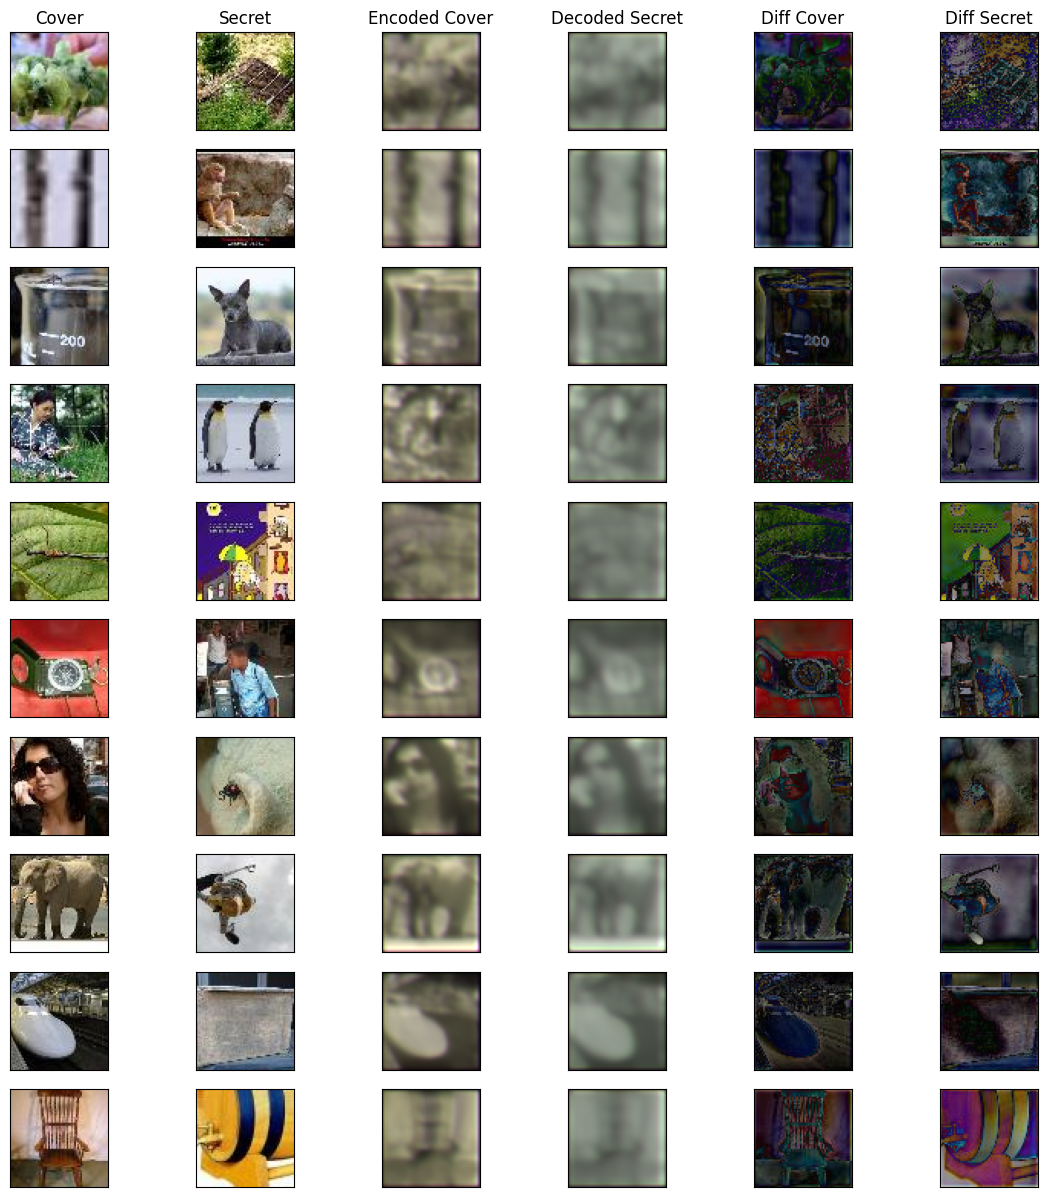

In [ ]:
# Show images in gray scale
SHOW_GRAY = False
# Show difference bettwen predictions and ground truth.
SHOW_DIFF = True

# Diff enhance magnitude
ENHANCE = 1

# Number of secret and cover pairs to show.
n = 10

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(n_rows, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

plt.figure(figsize=(14, 15))
rand_indx = [random.randint(0, 200) for x in range(n)]
# for i, idx in enumerate(range(0, n)):
for i, idx in enumerate(rand_indx):
    n_col = 6 if SHOW_DIFF else 4

    show_image(X_test_cover[idx], n, n_col, i * n_col + 1, gray=SHOW_GRAY, first_row=i==0, title='Cover')

    show_image(X_test_secret[idx], n, n_col, i * n_col + 2, gray=SHOW_GRAY, first_row=i==0, title='Secret')

    show_image(decoded_C[idx], n, n_col, i * n_col + 3, gray=SHOW_GRAY, first_row=i==0, title='Encoded Cover')

    show_image(decoded_S[idx], n, n_col, i * n_col + 4, gray=SHOW_GRAY, first_row=i==0, title='Decoded Secret')


    if SHOW_DIFF:
        show_image(np.multiply(diff_C[idx], ENHANCE), n, n_col, i * n_col + 5, gray=SHOW_GRAY, first_row=i==0, title='Diff Cover')

        show_image(np.multiply(diff_S[idx], ENHANCE), n, n_col, i * n_col + 6, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret')

plt.show()